Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [110]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [111]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', 
                 parse_dates=['created'], 
                 index_col='created')

# assert df.shape == (49352, 34)


# dtype_dict = {'ZIP_CODE': 'object',
#               'YEAR_BUILT': int}

# df = pd.read_csv(DATA_PATH+'condos/tribeca.csv', 
#                  dtype=dtype_dict, 
#                  parse_dates=['SALE_DATE'],
#                  index_col='SALE_DATE')

In [112]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [113]:
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48818 entries, 2016-06-24 07:54:24 to 2016-04-12 02:48:07
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bathrooms             48818 non-null  float64
 1   bedrooms              48818 non-null  int64  
 2   description           47393 non-null  object 
 3   display_address       48685 non-null  object 
 4   latitude              48818 non-null  float64
 5   longitude             48818 non-null  float64
 6   price                 48818 non-null  int64  
 7   street_address        48808 non-null  object 
 8   interest_level        48818 non-null  object 
 9   elevator              48818 non-null  int64  
 10  cats_allowed          48818 non-null  int64  
 11  hardwood_floors       48818 non-null  int64  
 12  dogs_allowed          48818 non-null  int64  
 13  doorman               48818 non-null  int64  
 14  dishwasher            48818 non-nul

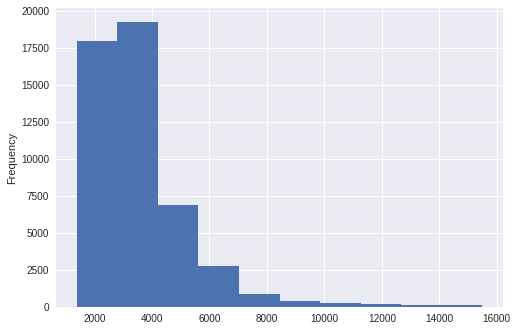

In [115]:
# plotting histogram of the target variable 
df['price'].plot(kind='hist')
# the data is positively skewed 

In [116]:
df['elevator'].value_counts()

1    25621
0    23197
Name: elevator, dtype: int64

In [117]:
df['bedrooms'].value_counts()

1    15651
2    14570
0     9317
3     7188
4     1825
5      221
6       43
8        2
7        1
Name: bedrooms, dtype: int64

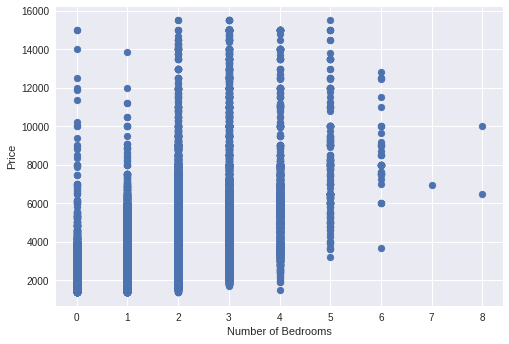

In [118]:
import matplotlib.pyplot as plt

# style
plt.style.use('seaborn')

plt.scatter(df['bedrooms'], df['price']);

plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

plt.show()

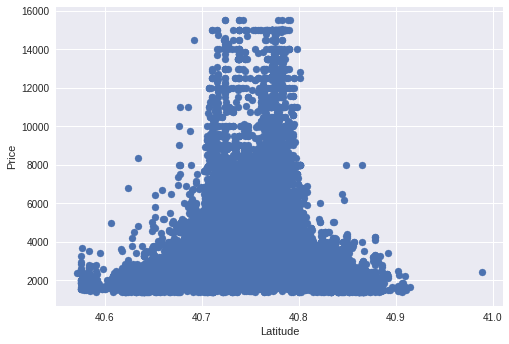

In [119]:
# style
plt.style.use('seaborn')

plt.scatter(df['latitude'], df['price']);

plt.xlabel('Latitude')
plt.ylabel('Price')

plt.show()

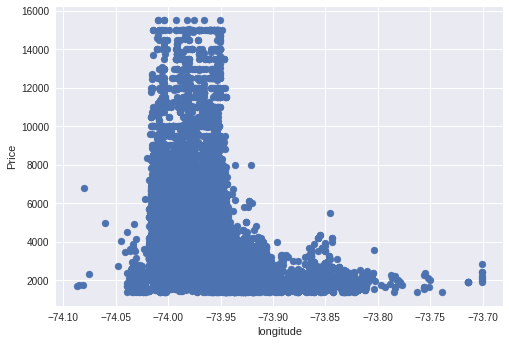

In [120]:
plt.style.use('seaborn')

plt.scatter(df['longitude'], df['price']);

plt.xlabel('longitude')
plt.ylabel('Price')

plt.show()

In [121]:
# working with total bedrooms and price
X = df[['bedrooms']]
y = df['price']

In [122]:
# # convert the created from an object to datetime so we can split our dataset using created 
# df["created"] = pd.to_datetime(df["created"])
# df["date_created"] = df["created"].dt.date
# df["date_created"]

In [123]:
# # make the new column date_created as the index
# df = df.set_index('created')
# df.head()

In [124]:
# date created ranges from April to June. We will make month of June as our test set 
# now we split the dataset in train and test 

cutoff = '2016-06-01'

# applying the filter 
filt = X.index < cutoff
X_train, y_train = X.loc[filt], y.loc[filt]
X_test, y_test = X.loc[~filt], y.loc[~filt]

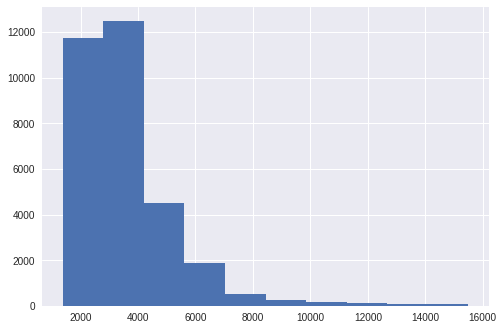

In [125]:
# baseline guess 

plt.hist(y_train);

In [126]:
baseline_guess = y_train.mean()

moe = abs(baseline_guess - y_train).mean()

print(f'prediction of a baseline model: ${round(baseline_guess,2)}, with a margin of error: ${round(moe,2)}')

prediction of a baseline model: $3575.6, with a margin of error: $1201.88


In [127]:
# need to make a model that is more accurate than the baseline model above 

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X,y);

In [129]:
lin_reg.coef_[0]

853.2541675274308

In [130]:
lin_reg.intercept_

2267.9741491780505

we could write the line equation to solve for the rent as follows:

rent = 853.25 * (total_bedrooms) + 2267.97

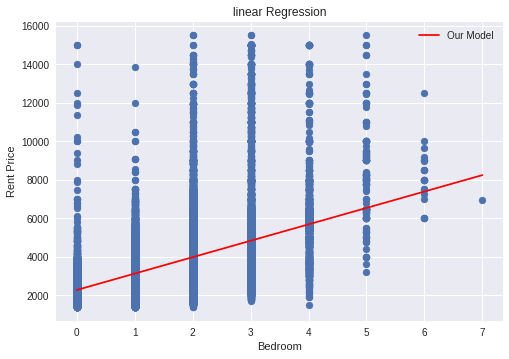

In [131]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred = lin_reg.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('linear Regression')
plt.legend()

In [132]:
# Calculating RMSE score 
rent_predictions = lin_reg.predict(X)
rmse_scores = np.sqrt(mean_squared_error(rent_predictions, y))
rmse_scores

1488.4182654983447

In [133]:
# validating the score using cross_val 
from sklearn.model_selection import cross_val_score

score = cross_val_score(lin_reg, X, y, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1513.61744299 1442.79761017 1499.819679   1467.77577563 1472.22972377
 1532.00247216 1516.93963044 1505.28687851 1454.30489412 1477.66023207]
1488.2434338868175


27.948469370335687

In [134]:
# Scores on the test and validation set are almost the same. this model is low on bias and low on variance. Hence, a perfect generalized model 

we should be able to make the score better by adding polynomial regression as the reation is not exactly linear. 

In [135]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_reg  = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
poly_reg.fit(X,y);


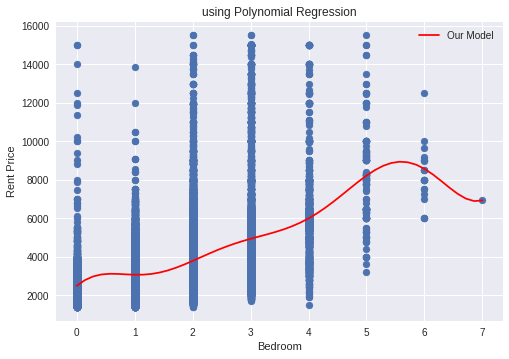

In [136]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred = poly_reg.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('using Polynomial Regression')
plt.legend()
plt.show()

In [137]:
# Calculating RMSE score 

rent_pred1 = poly_reg.predict(X)
rmse_scores = np.sqrt(mean_squared_error(rent_pred1, y))
rmse_scores

1474.6797574878146

In [138]:
# validating the score using cross_val 

score = cross_val_score(poly_reg, X, y, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1512.88016641 1430.65958021 1484.54500912 1456.01252246 1459.35066769
 1516.79119298 1501.40866314 1490.64732648 1446.80515383 1465.02692574]
1476.4127208057305


27.678018036346668

In [139]:
# we got the best model possible with polynomial features degrees set to 9 

Lets do it using Ridge Regression and see what we get. Don't accept to better resulst because model was not overfitting. 

In [140]:
from sklearn.linear_model import Ridge
# use Random Search to find the best value of alpha for ridge regression 
from sklearn.model_selection import RandomizedSearchCV

ridge = Ridge(normalize=True, random_state=42)
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-5, 1e-2, 1, 5,10, 20,30,40, 50, 60, 100, 110]}

ridge_reg = RandomizedSearchCV(ridge, parameters, scoring= 'neg_mean_squared_error', cv=10, random_state=42)
ridge_reg.fit(X,y)

print(ridge_reg.best_params_)
print(ridge_reg.best_estimator_)

{'alpha': 1e-08}
Ridge(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=42, solver='auto', tol=0.001)


In [141]:
# using the best value of alpha for ridge lets calculate the rmse and see if we get any better results 

ridge = ridge_reg.best_estimator_

# Calculating RMSE score 

rent_pred2 = ridge.predict(X)
rmse_scores = np.sqrt(mean_squared_error(rent_pred2, y))
rmse_scores

1488.4182654983447

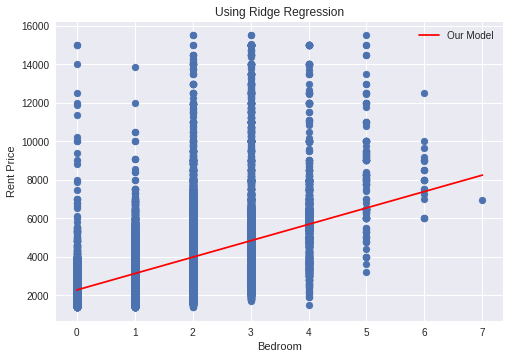

In [142]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred = ridge.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('Using Ridge Regression')
plt.legend()
plt.show()

In [143]:
# validating the score using cross_val 

score = cross_val_score(ridge, X, y, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1513.61744289 1442.79760998 1499.81967906 1467.77577537 1472.22972372
 1532.00247255 1516.93963049 1505.28687873 1454.30489411 1477.66023195]
1488.243433883667


27.948469504909475

Lets try usin Stochastic Gradient Descent with ridge

In [144]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state=42)
# lets start by finding out the best value of the learing rate 

parameters1 = {'eta0': [0.001, 0.005, 0.01, 0.03, 0.06, 0.09, 1, 1.05]}

sgd_regressor = RandomizedSearchCV(sgd_reg, parameters1, cv=10, scoring = 'neg_mean_squared_error', random_state=42)
sgd_regressor.fit(X,y)

print(sgd_regressor.best_params_)
print(sgd_regressor.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'eta0': 0.005}
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)


In [145]:
sgd_reg = sgd_regressor.best_estimator_

rent_pred4 = sgd_reg.predict(X)
rmse = np.sqrt(mean_squared_error(rent_pred4, y))
rmse

1488.652655898521

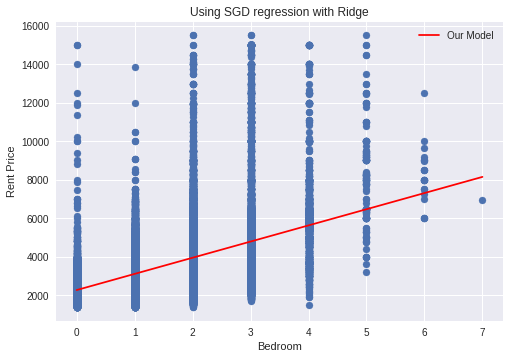

In [146]:
X_model = np.linspace(0, X_train['bedrooms'].max(), 50).reshape(-1,1)
# Note how we use the .predict() method with our model
rent_pred5 = sgd_reg.predict(X_model)

# Plot our data
plt.scatter(X_train, y_train)

# Plot the regression line
plt.plot(X_model, rent_pred5 , color='red', label='Our Model')

plt.xlabel('Bedroom')
plt.ylabel('Rent Price')
plt.title('Using SGD regression with Ridge')
plt.legend()
plt.show()

In [147]:
# validating the score using cross_val 
# shouldn't be any different than ridge regression

score = cross_val_score(sgd_reg, X, y, scoring= 'neg_mean_squared_error', cv=10)
rmse = np.sqrt(-score)
std_rmse = np.std(rmse)

print(rmse)
print(rmse.mean())
std_rmse

[1513.57503353 1443.298727   1499.67209299 1466.98882474 1472.31476895
 1532.83228657 1516.84217954 1504.98170739 1455.4029412  1477.19573594]
1488.310429785467


27.9007888499831